# Link to Dataset

Ireland

https://data.gov.ie/dataset/toa11-luas-passenger-numbers

Turkey 

API

https://data.ibb.gov.tr/tr/datastore/odata3.0/5c2b78fc-3b68-4722-844f-3051c358a13f
        
CSV

https://data.ibb.gov.tr/en/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/8bed95de-bbe2-4550-80f2-87ca51a97f3d/download/2022-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv

https://data.ibb.gov.tr/tr/datastore/odata3.0/5c2b78fc-3b68-4722-844f-3051c358a13f?$top=5&$format=json

In [1]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express, and Sci

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Import warnings and applyt filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Luas_Passenger_Number.csv")

# pd.read_csv function in order to read the csv file containing the population estimated construction status report

In [3]:
df1=pd.read_csv("Turkey_Rail_Passenger_Number.csv", encoding = 'latin-1')

df1 = pd.read_csv("Turkey_Rail_Passenger_Number.csv")

A problem was encountered when trying to open the file. To fix the problem, it was observed that there was a problem decoding a byte in the file using the 'utf-8' encoding, so an addition to the code was made accordingly.

In [4]:
df.head(5)

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,1,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5,May,Number,1934553


In [5]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('Luas_Passenger_Number.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('PopulationEstimatesDatabase1')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [6]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

STATISTIC           0
Statistic Label     0
TLIST(A1)           0
Year                0
C01885V02316       15
Month               0
UNIT                0
VALUE               0
dtype: int64

In [7]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C01885V02316',
       'Month', 'UNIT', 'VALUE'],
      dtype='object')

In [8]:
df.rename(columns={'Statistic Label':'Luas Type', 
                   'UNIT':'Unit', 'VALUE':'Value_Ireland', 'Month':'Month_Ireland'}, inplace=True)

In [9]:
df.head(5)

,STATISTIC,Luas Type,TLIST(A1),Year,C01885V02316,Month_Ireland,Unit,Value_Ireland
0,TOA11C01,Red line,2018,2018,1.0,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2.0,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3.0,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4.0,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5.0,May,Number,1934553


In [10]:
df.drop(columns=["STATISTIC", "TLIST(A1)", "C01885V02316","Unit"], inplace=True)

In [11]:
df.head(2)

,Luas Type,Year,Month_Ireland,Value_Ireland
0,Red line,2018,January,1664495
1,Red line,2018,February,1657562


In [12]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['Month_Ireland'] = df['Month_Ireland'].map(month_mapping)

df['Month_Ireland'] = pd.to_numeric(df['Month_Ireland'], errors='coerce')

df['Month_Ireland'].fillna(0, inplace=True)

df['Month_Ireland'] = df['Month_Ireland'].astype(int)

print(df)

          Luas Type  Year  Month_Ireland  Value_Ireland
0          Red line  2018              1        1664495
1          Red line  2018              2        1657562
2          Red line  2018              3        1661098
3          Red line  2018              4        1794424
4          Red line  2018              5        1934553
..              ...   ...            ...            ...
190  All Luas lines  2022              9        3811093
191  All Luas lines  2022             10        4219124
192  All Luas lines  2022             11        4375705
193  All Luas lines  2022             12        4030698
194  All Luas lines  2022              0       38667875

[195 rows x 4 columns]


In [13]:
df.isnull().sum() / len(df) * 100

Luas Type        0.0
Year             0.0
Month_Ireland    0.0
Value_Ireland    0.0
dtype: float64

In [14]:
df_frame = pd.DataFrame(df)

df_1 = df_frame[(df_frame['Luas Type'] == 'All Luas lines')]

print(df_1)

          Luas Type  Year  Month_Ireland  Value_Ireland
130  All Luas lines  2018              1        3218649
131  All Luas lines  2018              2        3118289
132  All Luas lines  2018              3        3097570
133  All Luas lines  2018              4        3350056
134  All Luas lines  2018              5        3622338
..              ...   ...            ...            ...
190  All Luas lines  2022              9        3811093
191  All Luas lines  2022             10        4219124
192  All Luas lines  2022             11        4375705
193  All Luas lines  2022             12        4030698
194  All Luas lines  2022              0       38667875

[65 rows x 4 columns]


In [15]:
df= pd.DataFrame(df)

df = df.drop(df[df['Luas Type'] == 'All Luas lines'].index)

print(df)

      Luas Type  Year  Month_Ireland  Value_Ireland
0      Red line  2018              1        1664495
1      Red line  2018              2        1657562
2      Red line  2018              3        1661098
3      Red line  2018              4        1794424
4      Red line  2018              5        1934553
..          ...   ...            ...            ...
125  Green line  2022              9        1830015
126  Green line  2022             10        2063739
127  Green line  2022             11        2097731
128  Green line  2022             12        1972696
129  Green line  2022              0       18392801

[130 rows x 4 columns]


In [16]:
df.head(2)

,Luas Type,Year,Month_Ireland,Value_Ireland
0,Red line,2018,1,1664495
1,Red line,2018,2,1657562


# Dataset

df = red line & green line

df_1 = All Luas line


In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [18]:
l_encoder = LabelEncoder()

# Put the type of all data of object type into the same shape (float).with the Encoder function.

In [19]:
df["Luas Type_Encoded"] =l_encoder.fit_transform(df["Luas Type"])

#To convert the numeric value of the 'Luas Type' column .l_encoder.fit_transform function

In [20]:
df_1["Luas Type_Encoded"] =l_encoder.fit_transform(df_1["Luas Type"])

In [21]:
df.head(2)

,Luas Type,Year,Month_Ireland,Value_Ireland,Luas Type_Encoded
0,Red line,2018,1,1664495,1
1,Red line,2018,2,1657562,1


Green Line = 1
Red Line=2

In [22]:
df_1.head(2)

,Luas Type,Year,Month_Ireland,Value_Ireland,Luas Type_Encoded
130,All Luas lines,2018,1,3218649,0
131,All Luas lines,2018,2,3118289,0


All Luas Lines = 0

In [23]:
df.drop(columns=["Luas Type"], inplace=True)

In [24]:
df_1.drop(columns=["Luas Type"], inplace=True)

In [25]:
df.head(2)

,Year,Month_Ireland,Value_Ireland,Luas Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1


In [26]:
df_1.head(2)

,Year,Month_Ireland,Value_Ireland,Luas Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               130 non-null    int64
 1   Month_Ireland      130 non-null    int32
 2   Value_Ireland      130 non-null    int64
 3   Luas Type_Encoded  130 non-null    int32
dtypes: int32(2), int64(2)
memory usage: 3.2 KB


In [28]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 130 to 194
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               65 non-null     int64
 1   Month_Ireland      65 non-null     int32
 2   Value_Ireland      65 non-null     int64
 3   Luas Type_Encoded  65 non-null     int32
dtypes: int32(2), int64(2)
memory usage: 2.0 KB


In [29]:
df.shape

(130, 4)

In [30]:
df_1.shape

(65, 4)

In [31]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df1=pd.read_csv("Turkey_Rail_Passenger_Number.csv", encoding = 'latin-1' ,na_values=missing_values )


In [32]:
df1.isnull().sum()

passage_cnt              0
passanger_cnt            0
transaction_year         0
transaction_month        0
transaction_day          0
line                     0
station_name          3657
station_number        3657
town                 51100
age                      0
longitude            85345
latitude             85345
dtype: int64

In [33]:
df1.columns

Index(['passage_cnt', 'passanger_cnt', 'transaction_year', 'transaction_month',
       'transaction_day', 'line', 'station_name', 'station_number', 'town',
       'age', 'longitude', 'latitude'],
      dtype='object')

In [34]:
df1.head(5)

,passage_cnt,passanger_cnt,transaction_year,transaction_month,transaction_day,line,station_name,station_number,town,age,longitude,latitude
0,1687,1656,2022,1,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,TAKSIM,TAK-KBT,Beyoðlu,20-30,28.986444,41.036750
1,2520,2469,2022,1,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoðlu,20-30,28.992028,41.034056
2,2157,2119,2022,1,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,TAKSIM,TAK-KBT,Beyoðlu,30-60,28.986444,41.036750
3,3163,3085,2022,1,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoðlu,30-60,28.992028,41.034056
4,1041,1006,2022,1,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoðlu,60+,28.992028,41.034056


In [35]:
df1.drop(columns=["station_name", "passage_cnt", "station_number", "town", "longitude", "latitude", "line"], inplace=True)

In [36]:
df1.head(2)

,passanger_cnt,transaction_year,transaction_month,transaction_day,age
0,1656,2022,1,1,20-30
1,2469,2022,1,1,20-30


In [37]:
df1.rename(columns={ 'transaction_year':'Year', 'transaction_month':'Month_Turkey',
                    'transaction_day':'Day_Turkey', 'passanger_cnt':'Value_Turkey', 'age': 'Age'}, inplace=True)

In [38]:
df1.isnull().sum() / len(df) * 100

Value_Turkey    0.0
Year            0.0
Month_Turkey    0.0
Day_Turkey      0.0
Age             0.0
dtype: float64

In [39]:
df1["Age_Encoded"] =l_encoder.fit_transform(df1["Age"])

In [40]:
df1.head(2)

,Value_Turkey,Year,Month_Turkey,Day_Turkey,Age,Age_Encoded
0,1656,2022,1,1,20-30,0
1,2469,2022,1,1,20-30,0


In [41]:
df1.drop(columns=["Age"], inplace=True)

In [42]:
df1.head(2)

,Value_Turkey,Year,Month_Turkey,Day_Turkey,Age_Encoded
0,1656,2022,1,1,0
1,2469,2022,1,1,0


In [43]:
df_2022 = df[df['Year'] == 2022]

print(df_2022)

     Year  Month_Ireland  Value_Ireland  Luas Type_Encoded
52   2022              1         969269                  1
53   2022              2        1175851                  1
54   2022              3        1412504                  1
55   2022              4        1462424                  1
56   2022              5        1604768                  1
57   2022              6        1720853                  1
58   2022              7        1712030                  1
59   2022              8        1744936                  1
60   2022              9        1981078                  1
61   2022             10        2155385                  1
62   2022             11        2277974                  1
63   2022             12        2058002                  1
64   2022              0       20275074                  1
117  2022              1         841008                  0
118  2022              2        1056223                  0
119  2022              3        1265085                 

In [44]:
merged_df = pd.merge(df_2022, df1, on='Year', how='outer')

print(merged_df)

          Year  Month_Ireland  Value_Ireland  Luas Type_Encoded  Value_Turkey  \
0         2022              1         969269                  1          1656   
1         2022              1         969269                  1          2469   
2         2022              1         969269                  1          2119   
3         2022              1         969269                  1          3085   
4         2022              1         969269                  1          1006   
...        ...            ...            ...                ...           ...   
13549791  2022              0       18392801                  0           316   
13549792  2022              0       18392801                  0           116   
13549793  2022              0       18392801                  0           130   
13549794  2022              0       18392801                  0            92   
13549795  2022              0       18392801                  0            98   

          Month_Turkey  Day

In [45]:
merged_df.head(5)

,Year,Month_Ireland,Value_Ireland,Luas Type_Encoded,Value_Turkey,Month_Turkey,Day_Turkey,Age_Encoded
0,2022,1,969269,1,1656,1,1,0
1,2022,1,969269,1,2469,1,1,0
2,2022,1,969269,1,2119,1,1,1
3,2022,1,969269,1,3085,1,1,1
4,2022,1,969269,1,1006,1,1,2


# Dataset

df

df_1

df1

merged_df

In [46]:
import json
import requests

In [47]:
url = "https://data.ibb.gov.tr/tr/datastore/odata3.0/5c2b78fc-3b68-4722-844f-3051c358a13f?$top=5&$format=json"

In [48]:
res = requests.get(url)

In [49]:
res

<Response [200]>

In [50]:
res.text

'{"odata.metadata": "FIXME", "value": [{"_id":1,"passage_cnt":"9551","passanger_cnt":"9027","transaction_year":"2022","transaction_month":"01","transaction_day":"01","line":"F1-TAKSIM-KABATAS FUNIKILER HATTI","station_name":"KABATAS","station_number":"KTS-TKS","town":"Beyoðlu","longitude":"28.9920277777778","latitude":"41.0340555555556"},{"_id":2,"passage_cnt":"6791","passanger_cnt":"6418","transaction_year":"2022","transaction_month":"01","transaction_day":"01","line":"F1-TAKSIM-KABATAS FUNIKILER HATTI","station_name":"TAKSIM","station_number":"TAK-KBT","town":"Beyoðlu","longitude":"28.9864444444444","latitude":"41.03675"},{"_id":3,"passage_cnt":"3943","passanger_cnt":"3775","transaction_year":"2022","transaction_month":"01","transaction_day":"02","line":"F1-TAKSIM-KABATAS FUNIKILER HATTI","station_name":"TAKSIM","station_number":"TAK-KBT","town":"Beyoðlu","longitude":"28.9864444444444","latitude":"41.03675"},{"_id":4,"passage_cnt":"5133","passanger_cnt":"4972","transaction_year":"202

In [51]:
res.text[:10]

'{"odata.me'

In [52]:
data = json.loads(res.text)

In [53]:
data["odata.metadata"]

'FIXME'

In [54]:
type(data)

dict

In [55]:
json_data = json.dumps(data)

In [56]:
json_data

'{"odata.metadata": "FIXME", "value": [{"_id": 1, "passage_cnt": "9551", "passanger_cnt": "9027", "transaction_year": "2022", "transaction_month": "01", "transaction_day": "01", "line": "F1-TAKSIM-KABATAS FUNIKILER HATTI", "station_name": "KABATAS", "station_number": "KTS-TKS", "town": "Beyo\\u00f0lu", "longitude": "28.9920277777778", "latitude": "41.0340555555556"}, {"_id": 2, "passage_cnt": "6791", "passanger_cnt": "6418", "transaction_year": "2022", "transaction_month": "01", "transaction_day": "01", "line": "F1-TAKSIM-KABATAS FUNIKILER HATTI", "station_name": "TAKSIM", "station_number": "TAK-KBT", "town": "Beyo\\u00f0lu", "longitude": "28.9864444444444", "latitude": "41.03675"}, {"_id": 3, "passage_cnt": "3943", "passanger_cnt": "3775", "transaction_year": "2022", "transaction_month": "01", "transaction_day": "02", "line": "F1-TAKSIM-KABATAS FUNIKILER HATTI", "station_name": "TAKSIM", "station_number": "TAK-KBT", "town": "Beyo\\u00f0lu", "longitude": "28.9864444444444", "latitude":

In [57]:
df1.head(5)

,Value_Turkey,Year,Month_Turkey,Day_Turkey,Age_Encoded
0,1656,2022,1,1,0
1,2469,2022,1,1,0
2,2119,2022,1,1,1
3,3085,2022,1,1,1
4,1006,2022,1,1,2


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,130.0,2.020000e+03,1.419684e+00,2018.0,2019.0,2020.0,2021.0,2022.0
Month_Ireland,130.0,6.000000e+00,3.756132e+00,0.0,3.0,6.0,9.0,12.0
Value_Ireland,130.0,2.577068e+06,4.475703e+06,89358.0,918446.5,1659330.0,1971977.0,24301487.0
Luas Type_Encoded,130.0,5.000000e-01,5.019342e-01,0.0,0.0,0.5,1.0,1.0


# STATISTICS

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chisquare


# Random Forrest  
# Decision Tree

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,130.0,2.020000e+03,1.419684e+00,2018.0,2019.0,2020.0,2021.0,2022.0
Month_Ireland,130.0,6.000000e+00,3.756132e+00,0.0,3.0,6.0,9.0,12.0
Value_Ireland,130.0,2.577068e+06,4.475703e+06,89358.0,918446.5,1659330.0,1971977.0,24301487.0
Luas Type_Encoded,130.0,5.000000e-01,5.019342e-01,0.0,0.0,0.5,1.0,1.0


In [61]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Value_Turkey,521146.0,1709.319465,2283.514409,1.0,384.0,946.0,2103.0,28344.0
Year,521146.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
Month_Turkey,521146.0,6.549078,3.450531,1.0,4.0,7.0,10.0,12.0
Day_Turkey,521146.0,15.725054,8.796256,1.0,8.0,16.0,23.0,31.0
Age_Encoded,521146.0,2.000048,1.414458,0.0,1.0,2.0,3.0,4.0


In [62]:
data1 = df["Value_Ireland"].sample(n=100)
data2 = df1["Value_Turkey"].sample(n=100)

stat, p = wilcoxon(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=0.000, p=0.000
There is significant difference between median values (H0 can be rejected)


In [63]:
#One-sample hypothesis tests

stat, p = ttest_1samp(data1, 119052)

# test resul
print("Statistics=%.3f, p=%.3f" % (stat, p))

# assessing the p-value
alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")
    
    
    
#For df2
stat, p = ttest_1samp(data2, 119052)

# test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# assessing the p-value
alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

Statistics=5.603, p=0.000
The mean of the dataset does not equal 0.8 (H0 is rejected)
Statistics=-438.896, p=0.000
The mean of the dataset does not equal 0.8 (H0 is rejected)


In [64]:
# T-test 

stat, p = ttest_ind(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))

# assessing the p-value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=5.880, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [65]:
# Analysis of Variance

stat, p = f_oneway(data1, data2)

# Test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=34.574, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [66]:
# Chi-Squared test

#chi-squared function
def cs(data1, data2):
    return chisquare(data1, np.sum(data1)/np.sum(data2) * data2)

#get result for chi-squared with cs fundtion
stat, p = cs(data1, data2)


# test results
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p value result
alpha = 0.05
if p > alpha:
    print("Frequency distributions are equal (H0 cannot be rejected)")
else:
    print("Frequency distributions are uneven (H0 is rejected)")

Statistics=1891610190.055, p=0.000
Frequency distributions are uneven (H0 is rejected)


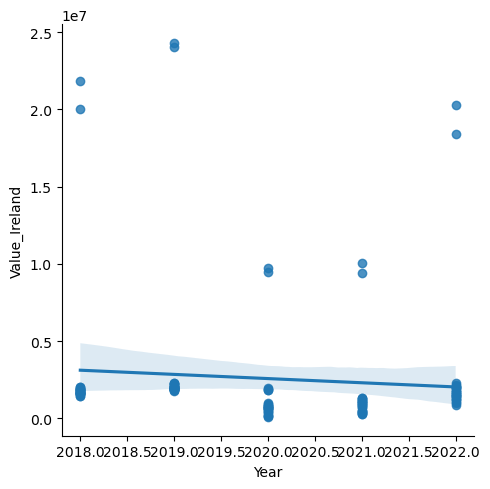

In [67]:
sns.lmplot(x='Year', y='Value_Ireland', data=df)

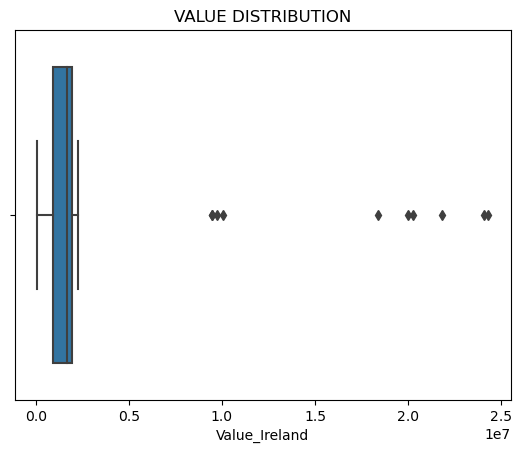

In [68]:
sns.boxplot(x=df['Value_Ireland'])
plt.title("VALUE DISTRIBUTION")
plt.show()

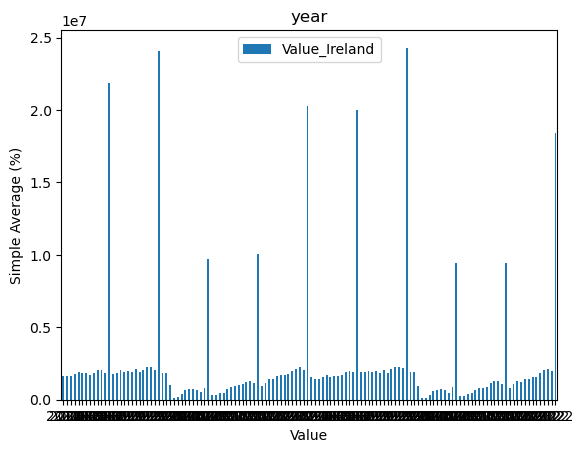

In [69]:
df.plot(kind='bar', x='Year', y='Value_Ireland', rot=0)
plt.title("year")
plt.xlabel('Value')
plt.ylabel('Simple Average (%)')
plt.show()

<Axes: >

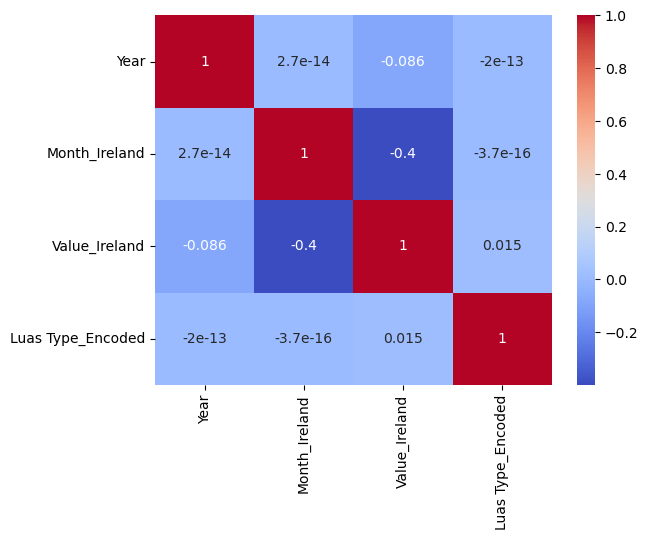

In [70]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

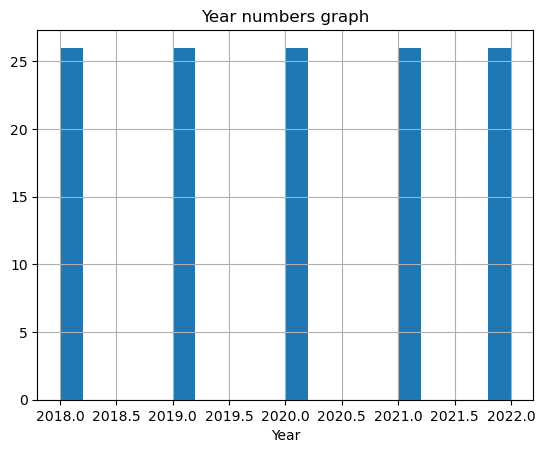

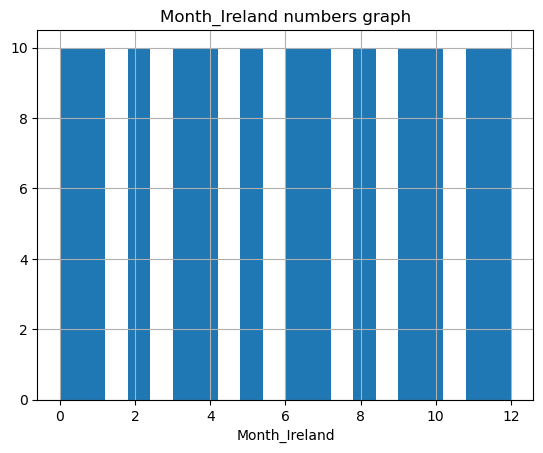

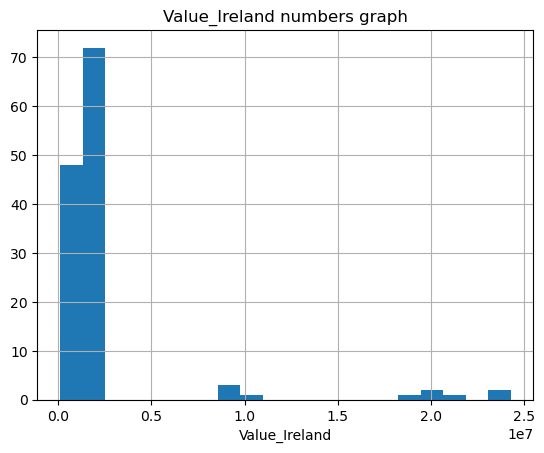

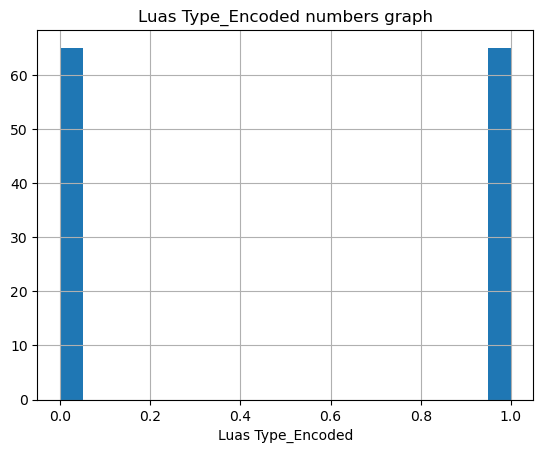

In [71]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.title("{} numbers graph".format(col))
    plt.xlabel(numerical_col)
    plt.show(block=True)

for col in df.columns:
    plot_numerical_col(df, col)